In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

llm_detect_ai_generated_text_path = kagglehub.competition_download('llm-detect-ai-generated-text')
erenakbulut_sentence_transformers_path = kagglehub.dataset_download('erenakbulut/sentence-transformers')
alejopaullier_daigt_external_dataset_path = kagglehub.dataset_download('alejopaullier/daigt-external-dataset')
narsil_daigt_misc_path = kagglehub.dataset_download('narsil/daigt-misc')
darraghdog_hello_claude_1000_essays_from_anthropic_path = kagglehub.dataset_download('darraghdog/hello-claude-1000-essays-from-anthropic')
thedrcat_daigt_proper_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-proper-train-dataset')
thedrcat_daigt_external_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-external-train-dataset')
kingki19_llm_generated_essay_using_palm_from_google_gen_ai_path = kagglehub.dataset_download('kingki19/llm-generated-essay-using-palm-from-google-gen-ai')
carlmcbrideellis_llm_7_prompt_training_dataset_path = kagglehub.dataset_download('carlmcbrideellis/llm-7-prompt-training-dataset')
thedrcat_daigt_v2_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-v2-train-dataset')
jdragonxherrera_augmented_data_for_llm_detect_ai_generated_text_path = kagglehub.dataset_download('jdragonxherrera/augmented-data-for-llm-detect-ai-generated-text')
nbroad_daigt_data_llama_70b_and_falcon180b_path = kagglehub.dataset_download('nbroad/daigt-data-llama-70b-and-falcon180b')
carlmcbrideellis_llm_mistral_7b_instruct_texts_path = kagglehub.dataset_download('carlmcbrideellis/llm-mistral-7b-instruct-texts')
datafan07_daigt_gemini_pro_8_5k_essays_path = kagglehub.dataset_download('datafan07/daigt-gemini-pro-8-5k-essays')
dardodel_4k_mixtral87b_crafted_essays_for_detect_ai_comp_path = kagglehub.dataset_download('dardodel/4k-mixtral87b-crafted-essays-for-detect-ai-comp')

print('Data source import complete.')


In [ ]:
import kagglehub
import random
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string
import tensorflow_text as tf_text
import matplotlib.pyplot as plt
import os
import kagglehub
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# # ─── 2. 下載所有需要的資料集 ───
# llm_detect_ai_generated_text_path = kagglehub.competition_download('llm-detect-ai-generated-text')
# alejopaullier_daigt_external_dataset_path = kagglehub.dataset_download('alejopaullier/daigt-external-dataset')
# narsil_daigt_misc_path = kagglehub.dataset_download('narsil/daigt-misc')
# darraghdog_hello_claude_1000_essays_from_anthropic_path = kagglehub.dataset_download('darraghdog/hello-claude-1000-essays-from-anthropic')
# thedrcat_daigt_proper_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-proper-train-dataset')
# kingki19_llm_generated_essay_using_palm_from_google_gen_ai_path = kagglehub.dataset_download('kingki19/llm-generated-essay-using-palm-from-google-gen-ai')
# carlmcbrideellis_llm_7_prompt_training_dataset_path = kagglehub.dataset_download('carlmcbrideellis/llm-7-prompt-training-dataset')
# thedrcat_daigt_v2_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-v2-train-dataset')
# jdragonxherrera_augmented_data_for_llm_detect_ai_generated_text_path = kagglehub.dataset_download('jdragonxherrera/augmented-data-for-llm-detect-ai-generated-text')
# nbroad_daigt_data_llama_70b_and_falcon180b_path = kagglehub.dataset_download('nbroad/daigt-data-llama-70b-and-falcon180b')
# carlmcbrideellis_llm_mistral_7b_instruct_texts_path = kagglehub.dataset_download('carlmcbrideellis/llm-mistral-7b-instruct-texts')
# datafan07_daigt_gemini_pro_8_5k_essays_path = kagglehub.dataset_download('datafan07/daigt-gemini-pro-8-5k-essays')
# dardodel_4k_mixtral87b_crafted_essays_for_detect_ai_comp_path = kagglehub.dataset_download('dardodel/4k-mixtral87b-crafted-essays-for-detect-ai-comp')
# # 新增：7-se7en-prompts 資料集
# Sentence_Transformers_from_Huggingface = kagglehub.dataset_download('erenakbulut/sentence-transformers')
# DAIGT_External_Train_Dataset = kagglehub.dataset_download("thedrcat/daigt-external-train-dataset")

# print('Data source import complete.')

In [ ]:
extra_train = pd.read_csv("/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv")
test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')

In [ ]:
# ─── 5. 建立各種來源的 extra_train_new ───
extra_train_1 = pd.read_csv("/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v7.csv").drop(['prompt_id','prompt_name'], axis=1)
extra_train_2 = pd.read_csv("/kaggle/input/hello-claude-1000-essays-from-anthropic/persuade15_claude_instant1.csv").drop(['prompt_id','essay_title'],axis=1).rename(columns = {'essay_text': 'text'})
extra_train_2['generated'] = 1
extra_train_3 = pd.read_csv("/kaggle/input/daigt-data-llama-70b-and-falcon180b/llama_falcon_v3.csv").drop(['prompt_name','model'], axis=1)
extra_train_4 = pd.read_csv("/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv").drop(['id','prompt_id'], axis=1)
extra_train_5 = pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv").rename(columns = {'label': 'generated'}).drop(['prompt_name','source', 'RDizzl3_seven'], axis=1)
extra_train_5 = extra_train_5[extra_train_5['generated'] == 0]
extra_train_5 = extra_train_5.sample(n=18149)
extra_train_6 = pd.read_csv("/kaggle/input/4k-mixtral87b-crafted-essays-for-detect-ai-comp/Mixtral8x7b_4k_essays_for_DetectAIGeneratedTextCompetition.csv").rename(columns = {'AI_Essay': 'text'}).drop(['model_Raw_output','student_id','prompt_id','index'], axis=1)
extra_train_6['generated'] = 1
extra_train_7 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv").rename(columns = {'label': 'generated'}).drop(['source', 'fold'], axis=1)
extra_train_8 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv").rename(columns = {'label': 'generated'}).drop(['essay_id','source', 'prompt', 'fold'], axis=1)
extra_train_9 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv").rename(columns = {'label': 'generated'}).drop(['essay_id','source', 'prompt', 'fold'], axis=1)
extra_train_10 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv").rename(columns = {'label': 'generated'}).drop(['essay_id','source', 'prompt', 'fold'], axis=1)

In [ ]:
extra_train_new = pd.concat([extra_train_1, extra_train_2,
                             extra_train_3, extra_train_4,
                             extra_train_5, extra_train_6,
                             extra_train_7, extra_train_8,
                             extra_train_9, extra_train_10], axis=0)

In [ ]:
extra_train_student_generated = extra_train[['text']]
extra_train_student_generated['generated'] = 0
extra_train_ai_generated = extra_train[['source_text']].rename(columns = {'source_text':'text'})
extra_train_ai_generated['generated'] = 1
extra_train_nf = pd.concat([extra_train_student_generated, extra_train_ai_generated, extra_train_new], axis=0)
extra_train_f = extra_train_nf.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
print(f"最終資料筆數：{len(extra_train_f)}")
extra_train_f

/tmp/ipykernel_35/4166364801.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



最終資料筆數：64798


,text,generated
0,Some schools in United States ofter classes fr...,0.0
1,"Four-day work week, a remarkable idea to conse...",0.0
2,Students and their families should consider an...,0.0
3,Agree you will never grow if something beyond ...,0.0
4,I think our character traits are formed by inf...,0.0
...,...,...
64793,Seeking multiple opinions when making an impor...,1.0
64794,Seeking multiple opinions can help someone mak...,1.0
64795,\nSeeking advice from more than one person whe...,1.0
64796,"Dear Principal Smith,\n\nI am writing to you r...",1.0


In [ ]:
# Create a temporary dataframe with counts of each category
count_df = extra_train_f['generated'].value_counts().reset_index()
count_df.columns = ['generated', 'count']

fig = px.bar(
    count_df,
    x='generated',
    y='count',
    title='Distribution of Generated Label',
    color=['#2E86AB', '#E84545'],
    color_discrete_map="identity"
)

# Customize layout for value display
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1])
)

# Display values on top of the bars
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside',
)

fig.show()

generated
1.0    33982
0.0    30816
Name: count, dtype: int64


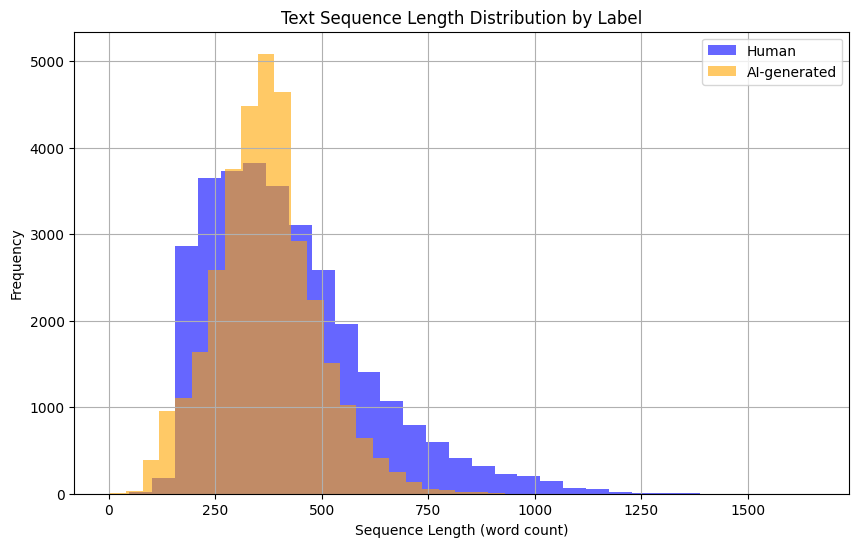

In [ ]:
# ─── 8. 簡單視覺化：文字長度分佈 ───
print(extra_train_f['generated'].value_counts())

# 計算每筆文字的詞數長度
extra_train_f['seq_len'] = extra_train_f['text'].apply(lambda x: len(str(x).split()))

# 分組
ai_data = extra_train_f[extra_train_f['generated'] == 1.0]['seq_len']
human_data = extra_train_f[extra_train_f['generated'] == 0.0]['seq_len']

# 畫圖
plt.figure(figsize=(10, 6))
plt.hist(human_data, bins=30, alpha=0.6, label='Human', color='blue')
plt.hist(ai_data, bins=30, alpha=0.6, label='AI-generated', color='orange')

plt.title('Text Sequence Length Distribution by Label')
plt.xlabel('Sequence Length (word count)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


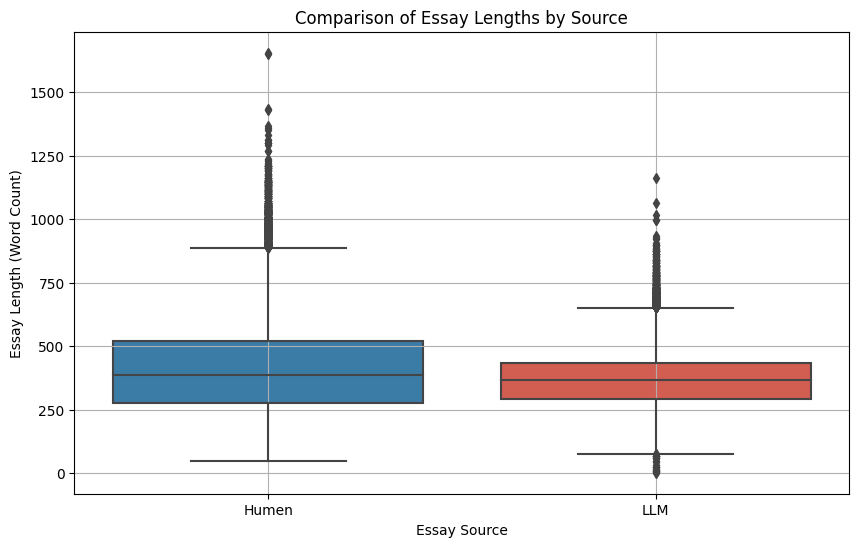

In [ ]:
# 箱型圖
extra_train_f['essay_length'] = extra_train_f['text'].apply(lambda x: len(str(x).split()))

extra_train_f['source'] = extra_train_f['generated'].map({0.0: 'Humen', 1.0: 'LLM'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='source', y='essay_length', data=extra_train_f, palette=['#2980B9', '#E74C3C'])

plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length (Word Count)')
plt.grid(True)
plt.show()

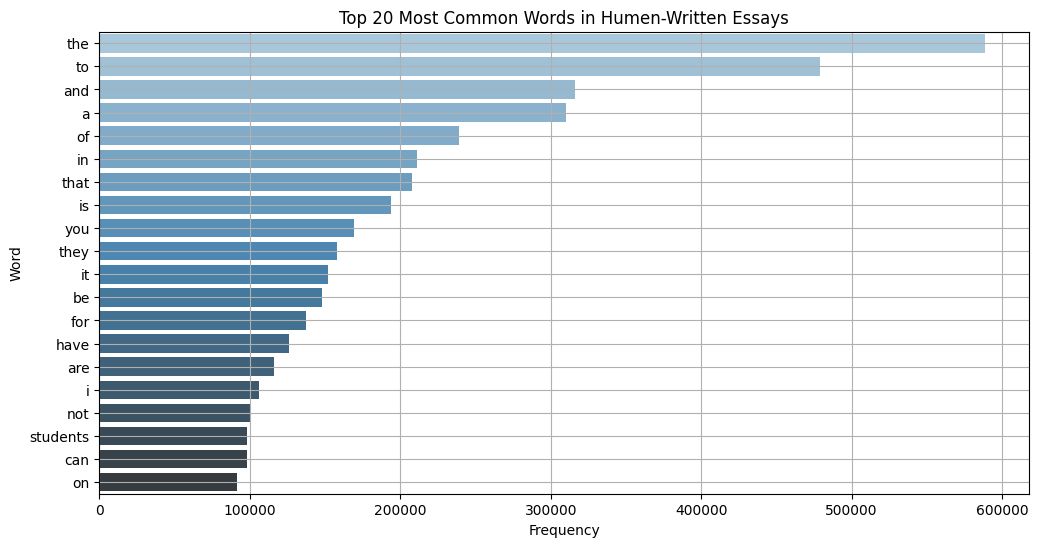

In [ ]:
# Human
human_texts = extra_train_f[extra_train_f['generated'] == 0.0]['text']

all_words = ' '.join(human_texts.astype(str)).lower().split()

word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # 取前20個常見詞

common_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_df, x='count', y='word', palette='Blues_d')
plt.title('Top 20 Most Common Words in Humen-Written Essays')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(True)
plt.show()


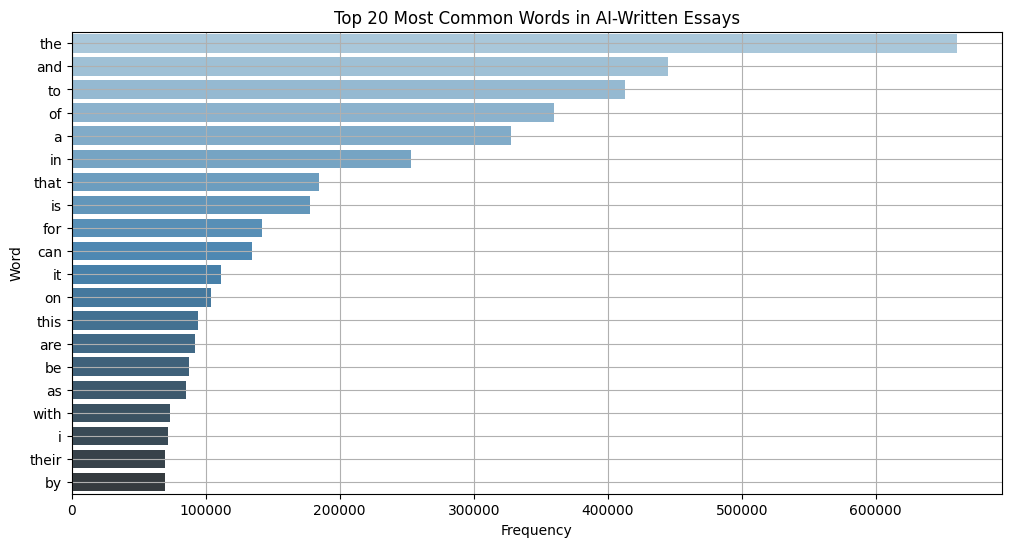

In [ ]:
# AI
ai_texts = extra_train_f[extra_train_f['generated'] == 1.0]['text']

all_words = ' '.join(ai_texts.astype(str)).lower().split()

word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # 取前20個常見詞

common_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_df, x='count', y='word', palette='Blues_d')
plt.title('Top 20 Most Common Words in AI-Written Essays')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(True)
plt.show()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


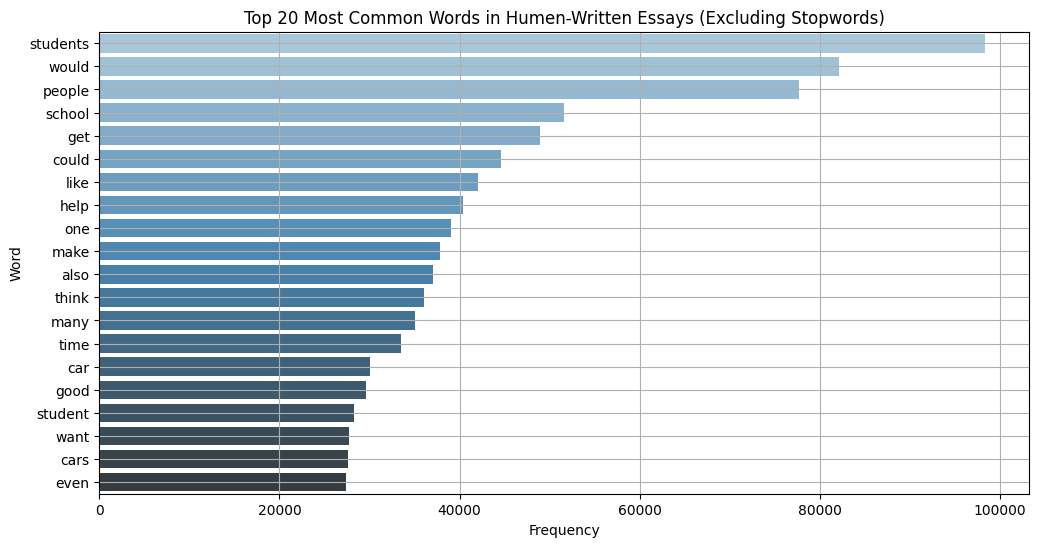

In [ ]:
# 去除stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Human
human_texts = extra_train_f[extra_train_f['generated'] == 0.0]['text']
all_words = ' '.join(human_texts.astype(str)).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # 前20個

common_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_df, x='count', y='word', palette='Blues_d')
plt.title('Top 20 Most Common Words in Humen-Written Essays (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(True)
plt.show()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


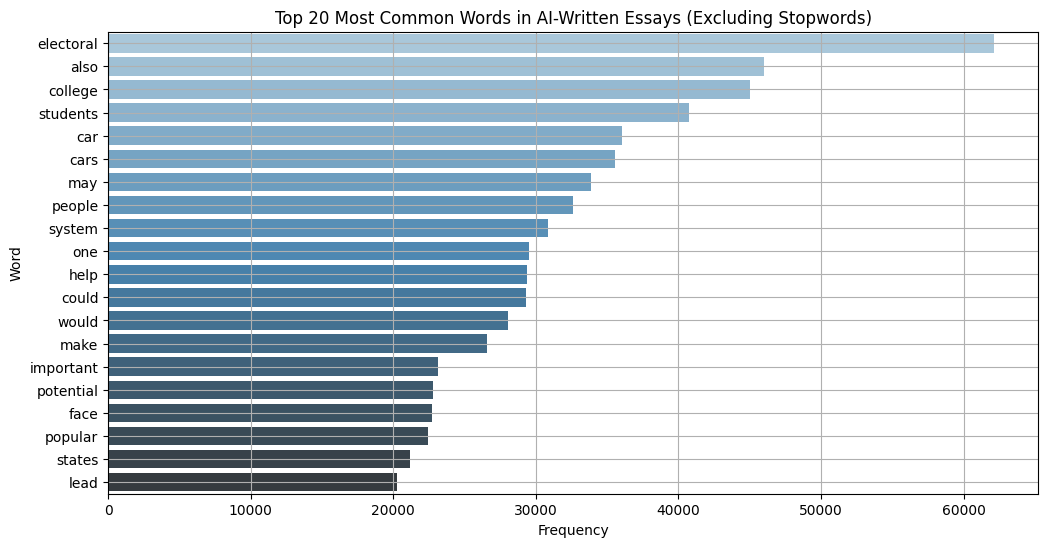

In [ ]:
# 去除stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# AI
ai_texts = extra_train_f[extra_train_f['generated'] == 1.0]['text']
all_words = ' '.join(ai_texts.astype(str)).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # 前20個

common_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=common_df, x='count', y='word', palette='Blues_d')
plt.title('Top 20 Most Common Words in AI-Written Essays (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(True)
plt.show()

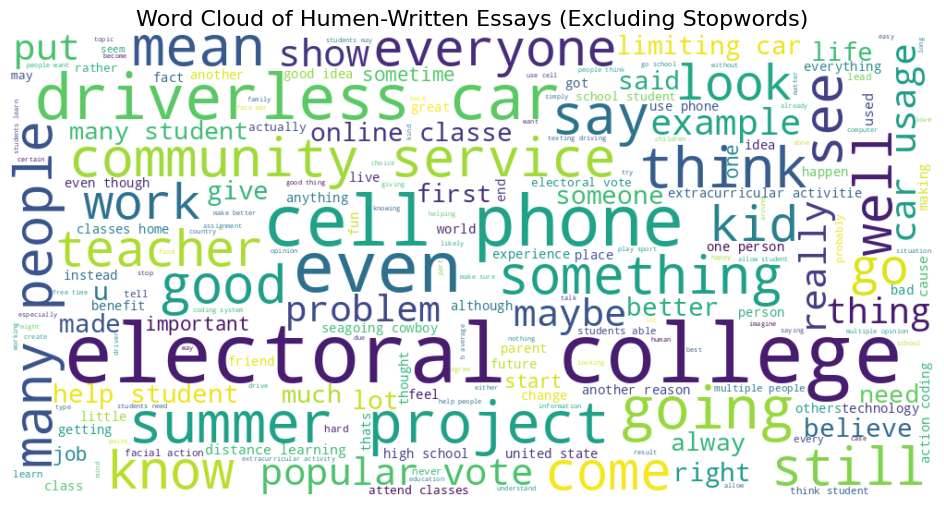

In [ ]:
# Human
human_texts = extra_train_f[extra_train_f['generated'] == 0.0]['text']

all_text = ' '.join(human_texts.astype(str)).lower()

filtered_words = ' '.join([
    word for word in all_text.split()
    if word.isalpha() and word not in stop_words
])

# WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(filtered_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Humen-Written Essays (Excluding Stopwords)", fontsize=16)
plt.show()

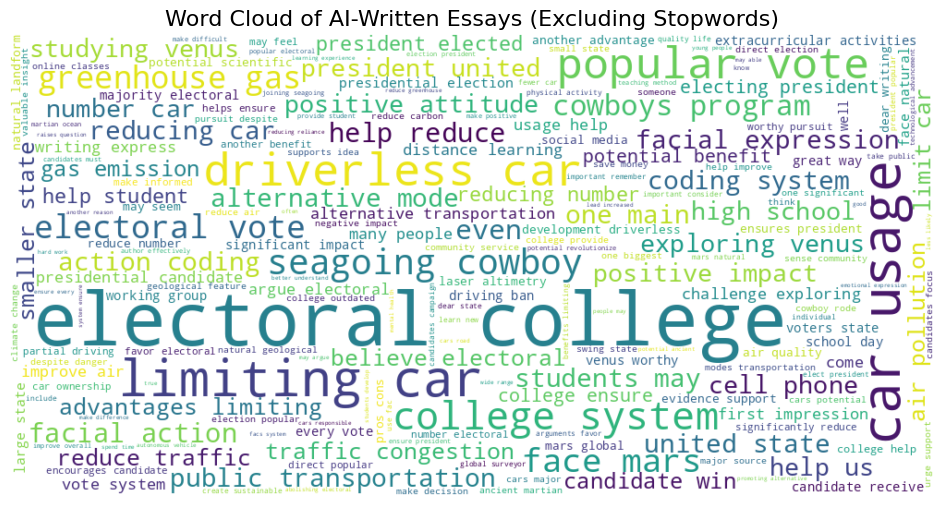

In [ ]:
# AI
ai_texts = extra_train_f[extra_train_f['generated'] == 1.0]['text']

all_text = ' '.join(ai_texts.astype(str)).lower()

filtered_words = ' '.join([
    word for word in all_text.split()
    if word.isalpha() and word not in stop_words
])

# WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(filtered_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of AI-Written Essays (Excluding Stopwords)", fontsize=16)
plt.show()

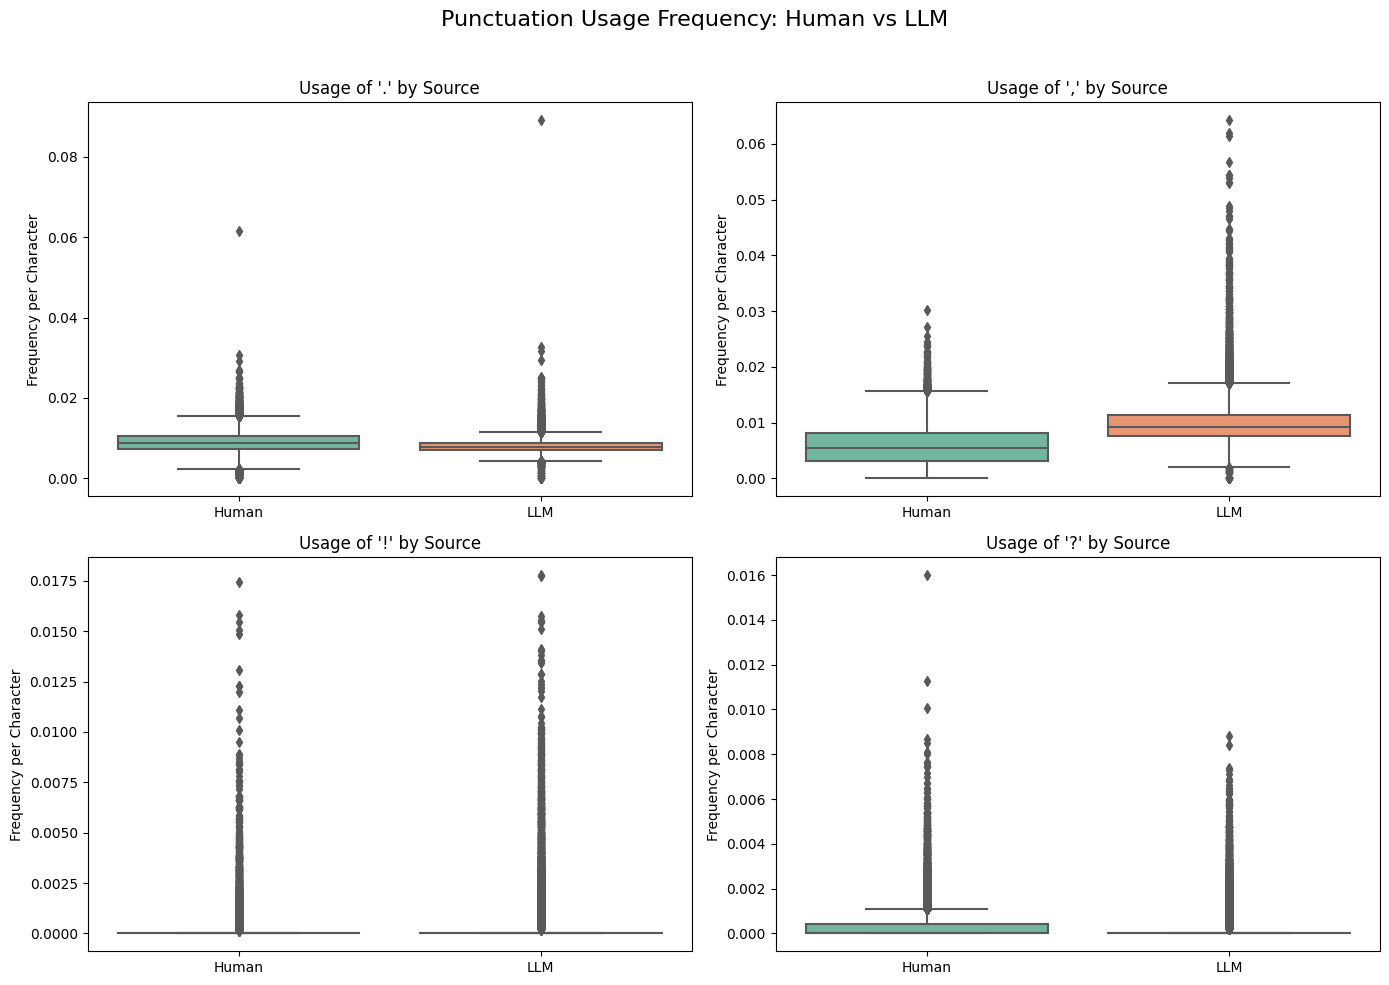

In [ ]:
# 標點符號使用頻率分析
punctuation_marks = ['.', ',', '!', '?']

for mark in punctuation_marks:
    extra_train_f[f'punct_{mark}'] = extra_train_f['text'].apply(
        lambda x: str(x).count(mark) / len(str(x)) if len(str(x)) > 0 else 0
    )

extra_train_f['source'] = extra_train_f['generated'].map({0.0: 'Human', 1.0: 'LLM'})

# boxplot
plt.figure(figsize=(14, 10))
for i, mark in enumerate(punctuation_marks):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=extra_train_f, x='source', y=f'punct_{mark}', palette='Set2')
    plt.title(f"Usage of '{mark}' by Source")
    plt.xlabel('')
    plt.ylabel('Frequency per Character')

plt.suptitle("Punctuation Usage Frequency: Human vs LLM", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

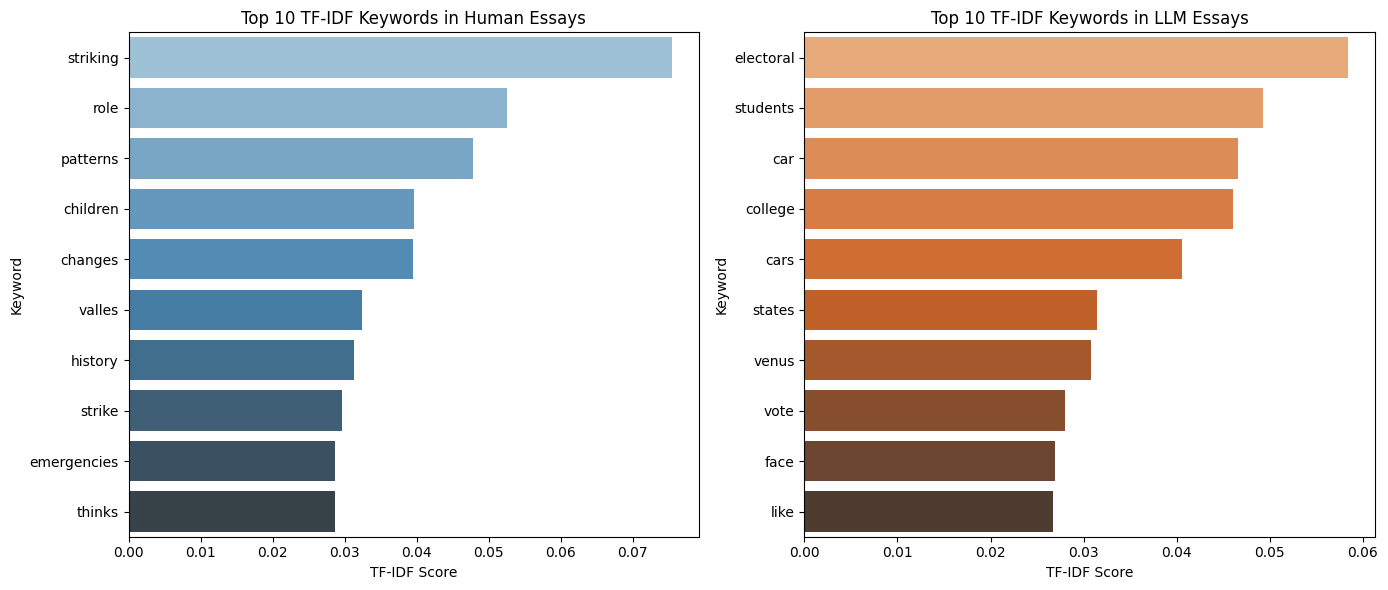

In [ ]:
# TF-IDF
human_texts = extra_train_f[extra_train_f['generated'] == 0.0]['text'].astype(str)
ai_texts = extra_train_f[extra_train_f['generated'] == 1.0]['text'].astype(str)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

human_tfidf = vectorizer.fit_transform(human_texts)
ai_tfidf = vectorizer.fit_transform(ai_texts)

words = vectorizer.get_feature_names_out()

# 平均TF-IDF權重
human_avg = human_tfidf.mean(axis=0).A1
ai_avg = ai_tfidf.mean(axis=0).A1

# top 10
human_top10 = pd.DataFrame({'word': words, 'score': human_avg}).nlargest(10, 'score')
ai_top10 = pd.DataFrame({'word': words, 'score': ai_avg}).nlargest(10, 'score')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=human_top10, x='score', y='word', palette='Blues_d')
plt.title("Top 10 TF-IDF Keywords in Human Essays")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")

plt.subplot(1, 2, 2)
sns.barplot(data=ai_top10, x='score', y='word', palette='Oranges_d')
plt.title("Top 10 TF-IDF Keywords in LLM Essays")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")

plt.tight_layout()
plt.show()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


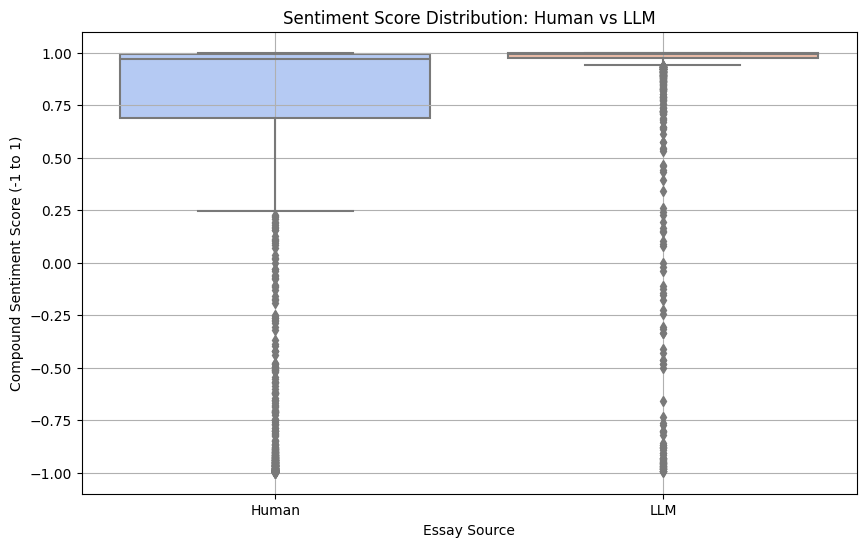

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sample_df = extra_train_f[['text', 'generated']].sample(n=3000, random_state=42).copy()

# 分析情感分數
sample_df['sentiment'] = sample_df['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

sample_df['source'] = sample_df['generated'].map({0: 'Human', 1: 'LLM'})

plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_df, x='source', y='sentiment', palette='coolwarm')
plt.title('Sentiment Score Distribution: Human vs LLM')
plt.xlabel('Essay Source')
plt.ylabel('Compound Sentiment Score (-1 to 1)')
plt.grid(True)
plt.show()

In [ ]:
train_final = extra_train_f
train_final

,text,generated,seq_len,essay_length,source,punct_.,"punct_,",punct_!,punct_?
0,Some schools in United States ofter classes fr...,0.0,436,436,Human,0.012987,0.000000,0.0,0.000000
1,"Four-day work week, a remarkable idea to conse...",0.0,529,529,Human,0.004801,0.015879,0.0,0.000000
2,Students and their families should consider an...,0.0,445,445,Human,0.008136,0.008911,0.0,0.000000
3,Agree you will never grow if something beyond ...,0.0,363,363,Human,0.007226,0.007782,0.0,0.000556
4,I think our character traits are formed by inf...,0.0,190,190,Human,0.012511,0.008043,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
64793,Seeking multiple opinions when making an impor...,1.0,343,343,LLM,0.006452,0.008756,0.0,0.000000
64794,Seeking multiple opinions can help someone mak...,1.0,283,283,LLM,0.008314,0.004751,0.0,0.000000
64795,\nSeeking advice from more than one person whe...,1.0,359,359,LLM,0.007702,0.005991,0.0,0.000000
64796,"Dear Principal Smith,\n\nI am writing to you r...",1.0,320,320,LLM,0.008317,0.006360,0.0,0.000000


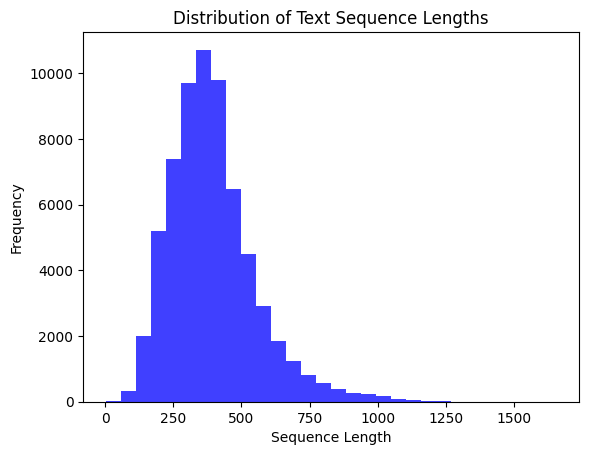

In [ ]:
# ─── 8. 簡單視覺化：文字長度分佈 ───
sequence_lengths = train_final['text'].apply(lambda x: len(x.split()))
plt.hist(sequence_lengths, bins=30, alpha=0.75, color='blue')
plt.title('Distribution of Text Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(train_final['generated'].value_counts())

generated
1.0    33982
0.0    30816
Name: count, dtype: int64


In [ ]:
train_df, val_df = train_test_split(train_final, test_size=0.3, random_state=222)

batch_size = 32

raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df['text'].values, train_df['generated'].values)
).batch(batch_size)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (val_df['text'].values, val_df['generated'].values)
).batch(batch_size)

In [ ]:
max_features = 75000
embedding_dim = 64
sequence_length = 512

def tf_lower_and_split_punct(text):
    text = tf_text.normalize_utf8(text, 'NFKD')
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
    text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
    text = tf.strings.strip(text)
    text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
    return text


# Text vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_features,
    ngrams = (3,5),
    output_mode="int",
    output_sequence_length=sequence_length,
    pad_to_max_tokens=True
)

text_ds = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)
vectorize_layer.adapt(train_df['text'].values)

def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)

In [ ]:
import numpy as np

def extract_handcrafted_features(texts):
    features = []
    for t in texts:
        word_count = len(t.split())
        capital_ratio = sum(1 for c in t if c.isupper()) / (len(t) + 1)
        punctuation_ratio = sum(t.count(p) for p in ['.', ',', '?', '!']) / (len(t) + 1)
        features.append([word_count, capital_ratio, punctuation_ratio])
    return np.array(features, dtype=np.float32)

# 抽特徵
train_feats = extract_handcrafted_features(train_df['text'].tolist())
val_feats = extract_handcrafted_features(val_df['text'].tolist())

# 轉成 Tensor
train_feat_tensor = tf.convert_to_tensor(train_feats, dtype=tf.float32)
val_feat_tensor = tf.convert_to_tensor(val_feats, dtype=tf.float32)

In [ ]:
# 結合 text 和統計特徵作為雙輸入
train_ds = tf.data.Dataset.from_tensor_slices((
    (train_df['text'].values, train_feat_tensor),
    train_df['generated'].values
))

val_ds = tf.data.Dataset.from_tensor_slices((
    (val_df['text'].values, val_feat_tensor),
    val_df['generated'].values
))

# 定義 mapping function
def vectorize_with_features(inputs, label):
    text, feats = inputs
    return (vectorize_layer(text), feats), label

train_ds = train_ds.map(vectorize_with_features).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(vectorize_with_features).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_features,
    ngrams=(3,5),
    output_mode="int",
    output_sequence_length=sequence_length,  # e.g., 512
    pad_to_max_tokens=True
)
vectorize_layer.adapt(train_df['text'].values)

In [ ]:
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras import Model, Input

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.models import Model

# 文字序列 Input
text_input = Input(shape=(sequence_length,), dtype="int64", name="text_input")
x1 = Embedding(max_features, embedding_dim)(text_input)
x1 = Bidirectional(LSTM(32, return_sequences=True))(x1)
x1 = GlobalMaxPooling1D()(x1)

# 統計特徵 Input
feat_input = Input(shape=(3,), dtype="float32", name="feature_input")  # 三個統計特徵

# 合併文字+特徵
x = Concatenate()([x1, feat_input])
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid", name="predictions")(x)

model = Model(inputs=[text_input, feat_input], outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 512, 64)        │      4,800,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 512, 64)        │         24,832 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 64)             │              0 │ bidirectional_1[0][0]  │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_input             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 67)             │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ feature_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │          8,704 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ predictions (Dense)       │ (None, 1)              │            129 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,833,665 (18.44 MB)

 Trainable params: 4,833,665 (18.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

epochs = 5
history_lstm = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - binary_accuracy: 0.7468 - loss: 4.4090 - val_binary_accuracy: 0.9852 - val_loss: 0.0496
Epoch 2/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 64s 45ms/step - binary_accuracy: 0.9888 - loss: 0.0423 - val_binary_accuracy: 0.9944 - val_loss: 0.0264
Epoch 3/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - binary_accuracy: 0.9971 - loss: 0.0139 - val_binary_accuracy: 0.9930 - val_loss: 0.0331
Epoch 4/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 63s 44ms/step - binary_accuracy: 0.9985 - loss: 0.0071 - val_binary_accuracy: 0.9898 - val_loss: 0.0455
Epoch 5/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - binary_accuracy: 0.9984 - loss: 0.0082 - val_binary_accuracy: 0.9919 - val_loss: 0.0390


In [ ]:
test_text = test['text'].values
vectorized_test_text = vectorize_layer(test_text)
test_feats = extract_handcrafted_features(test_text)
predictions = model.predict([vectorized_test_text, test_feats])
test['generated'] = predictions
print(test[['text', 'generated']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
           text  generated
0  Aaa bbb ccc.   0.998991
1  Bbb ccc ddd.   0.998991
2  CCC ddd eee.   0.999041


In [ ]:
test[['id', 'generated']].to_csv("submission.csv")
# test[['id', 'generated']].to_csv("submission.csv", index=false)

In [ ]:
sample_sub = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv")

In [ ]:
sample_sub["generated"] = predictions.squeeze()   # 或 predictions[:, 0]

In [ ]:
sample_sub.to_csv("submission.csv", index=False)

In [ ]:
print(sample_sub.head())

         id  generated
0  0000aaaa   0.998991
1  1111bbbb   0.998991
2  2222cccc   0.999041
